<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Visualizations

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In this example we will be working with data collected from a Combined Cycle Power Plant over 6 years (2006-2011). Our objective would be to predict the net hourly electrical energy output (EP) of the plant.  To do so we have data on several environmental characteristics taken at hourly timestamps, which are taken as averages from various sensors located around the plant: 
- AT: Ambient Temperature in °C,
- AP: Ambient Pressure in milibar,
- RH: Relative Humidity in %
- V: Exhaust Vacuum in cm Hg
- PE (target): Net hourly electrical energy output in MW  

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has effect on the Steam Turbine, the other three ambient variables affect the GT performance.

Data available at https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

We will also add in one more column *Output* which contains the string "High" if the energy output is greater than or equal to 450 MW, and "low" if the value of PE is less than 450 MW

In [4]:
# Read in the data
data = pd.read_excel('CCPP_data.xls',sheet_name=None)
ccpp_data = pd.concat((data[key] for key in data.keys()),axis=0)
ccpp_data['Output'] = np.where(ccpp_data['PE']>=450,'High','Low')
ccpp_data.head()

,AT,V,AP,RH,PE,Output
0,14.96,41.76,1024.07,73.17,463.26,High
1,25.18,62.96,1020.04,59.08,444.37,Low
2,5.11,39.40,1012.16,92.14,488.56,High
3,20.86,57.32,1010.24,76.64,446.48,Low
4,10.82,37.50,1009.23,96.62,473.90,High


## Descriptive Statistics
Before we jump into visualizations, let's first calculate some descriptive statistics on our data.  A handy way to do this is to use the pandas `df.describe()` method.

In [6]:
# Display basic statistics for each column of our data
ccpp_data.describe()

,AT,V,AP,RH,PE
count,47840.000000,47840.000000,47840.000000,47840.000000,47840.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452162,12.707362,5.938535,14.599658,17.066281
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


As we can see above, we now have some valuable information on each column of our data, including the count of values, mean, standard deviation, min/max and quartiles.  You will note that the table above does not include the "Output" column since it is not numeric.

Let's say we now want to calculate statistics on our data separately for observations with "High" energy output vs. "Low" energy output.  We can group our data by "Output" and calculate statistics for each group.

In [15]:
# Group and calculate statistics on each group
data_grouped = ccpp_data.groupby('Output').agg(['mean','std','min','max','count'])

# View the transposed (.T) dataframe for easier viewing
data_grouped.T

Output            High           Low
AT mean      13.817215     26.071851
   std        4.749093      3.626086
   min        1.810000      6.220000
   max       32.310000     37.110000
   count  25065.000000  22775.000000
V  mean      44.488398     65.110338
   std        6.976551      7.925374
   min       25.360000     36.300000
   max       71.140000     81.560000
   count  25065.000000  22775.000000
AP mean    1015.913766   1010.337464
   std        5.998514      4.264654
   min      992.890000    997.340000
   max     1033.300000   1023.430000
   count  25065.000000  22775.000000
RH mean      78.011430     68.133699
   std       12.744696     14.760088
   min       28.810000     25.560000
   max      100.160000    100.110000
   count  25065.000000  22775.000000
PE mean     468.248171    439.085912
   std       10.797928      6.156608
   min      450.000000    420.260000
   max      495.760000    449.990000
   count  25065.000000  22775.000000

If we look closely at the above statistics for each group, we can observe some substantial differences between the values for certain variables in the observations with "High" output vs "Low" output (e.g. look at the mean of AT for each group).  This can give us insights on which features may be important in building a predictive model of the energy output.

## Scatterplots
Scatterplots are a useful way to understand the distribution of your data and begin to identify relationships between variables.  Let's create a pairplot to look at *AT* (a feature) and *PE* (the target).

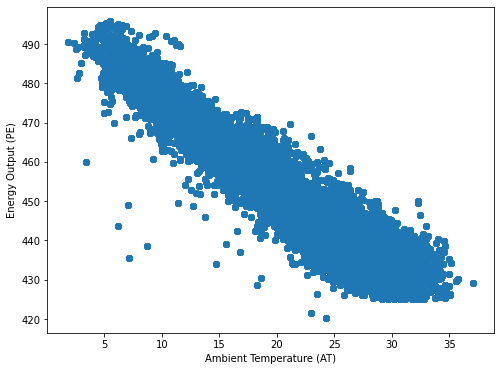

In [7]:
# Create a scatterplot of AT and PE
plt.figure(figsize=(8,6))
plt.scatter(x=ccpp_data['AT'],y=ccpp_data['PE'])
plt.xlabel('Ambient Temperature (AT)')
plt.ylabel('Energy Output (PE)')
plt.show()

## Histograms
Now let's visualize *AT* and *AP* with histograms to better understand their distributions

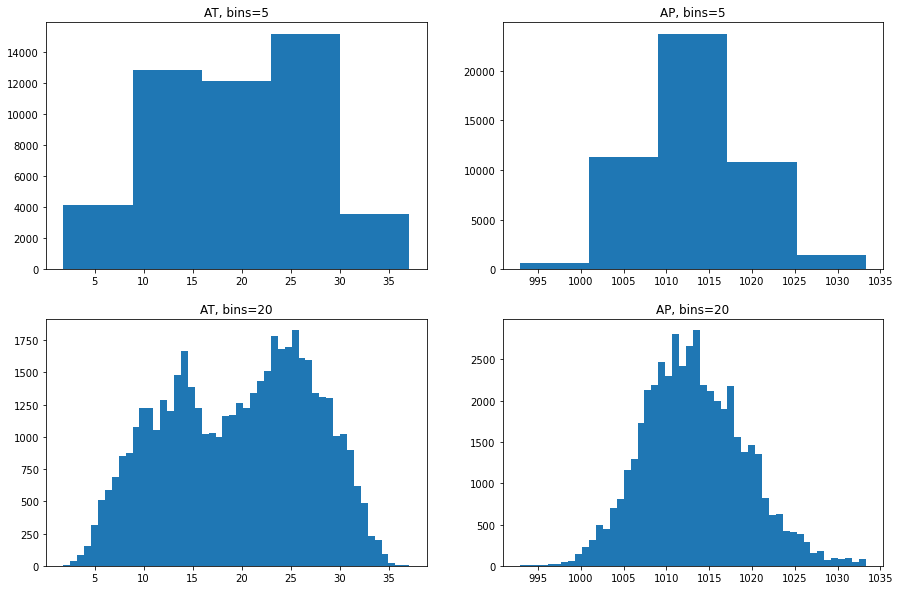

In [21]:
# View histogram of each feature amygdala and acc
fig,ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].hist(ccpp_data['AT'],bins=5)
ax[0,0].set_title('AT, bins=5')
ax[0,1].hist(ccpp_data['AP'],bins=5)
ax[0,1].set_title('AP, bins=5')
ax[1,0].hist(ccpp_data['AT'],bins=50)
ax[1,0].set_title('AT, bins=20')
ax[1,1].hist(ccpp_data['AP'],bins=50)
ax[1,1].set_title('AP, bins=20')
plt.show()

## Boxplots
Let's use a boxplot to better understand the values of the features which lead to a "High" output energy production rather than "Low" production.  We will create boxplots of *AT* and *AP*, grouping the values by *Output* (which has two possible values "High" and "Low" so we will have two groups displayed).

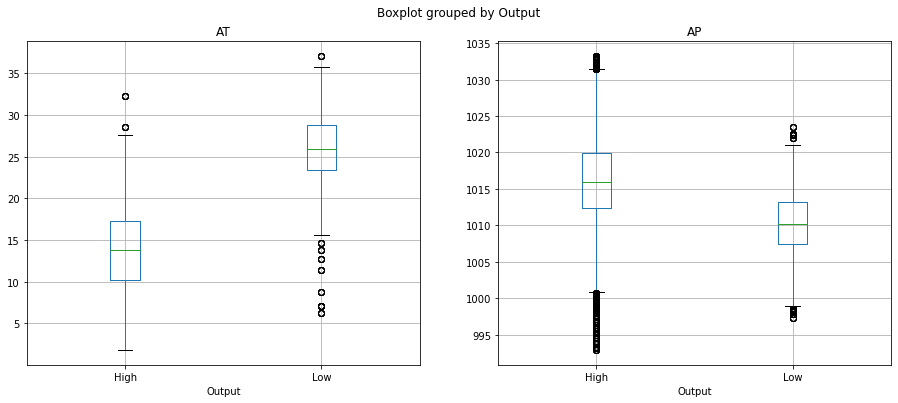

In [25]:
# Create boxplots of amygdala size and acc size grouped by orientation
fig,ax = plt.subplots(1,2,figsize=(15,6))
for i,col in enumerate(['AT','AP']):
    ccpp_data.boxplot(column=col,by='Output',ax=ax[i])
plt.show()

From the boxplots above, we can visually identify a couple of interesting insights:  
1) Lower values of ambient temperature appear to be associated with high power output (which we also noted in our scatterplot above of PE vs AT)  
2) Higher values of ambient pressure appear to be associated with high power output